# Comparison of 5 Classification algorithms : Decision Tree, Random Forest, Boosted Tree, Support Vector Machines, Neural Networks

## About the dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed

### Attribute Info


For each record in the dataset the following is provided:
*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
*   Triaxial Angular velocity from the gyroscope

*   A 561-feature vector with time and frequency domain variables.
*   Its activity label.

*   An identifier of the subject who carried out the experiment.







In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Obtain the data

In [0]:
#loading train and test data
train = pd.read_csv('/content/drive/My Drive/HAR/csv_files/train.csv')
test = pd.read_csv('/content/drive/My Drive/HAR/csv_files/test.csv')

In [0]:
print("Number of train data points:",train.shape[0])
print("Number of test data points:",test.shape[0])
print("number of features:",train.shape[1])
train.head(5)

Number of train data points: 7352
Number of test data points: 2947
number of features: 564


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.57

In [0]:
#Checking for duplicates in train and test data
print(any(train.duplicated()))
print(any(test.duplicated()))

False
False


In [4]:
#checking for null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## Checking for data imbalance

<function matplotlib.pyplot.plot>

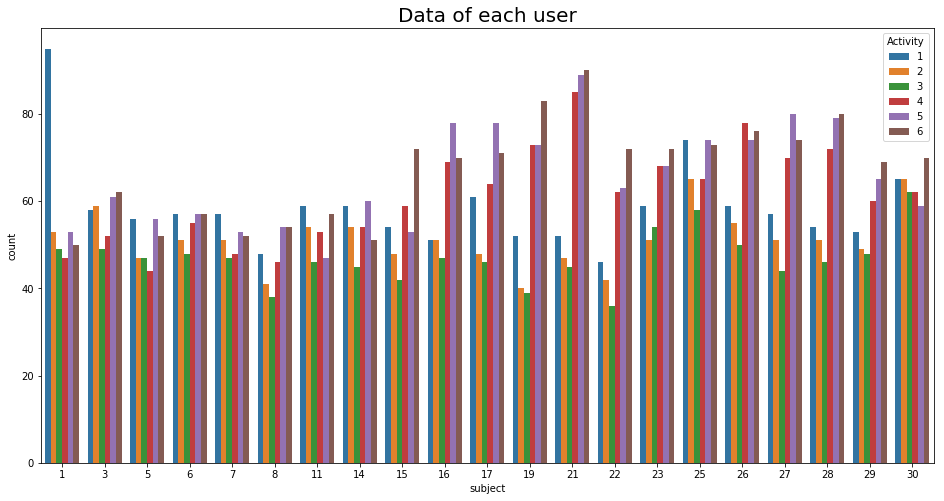

In [0]:

plt.figure(figsize=(16,8))
plt.title("Data of each user",fontsize=20)
sn.countplot(x='subject',hue='Activity',data=train)
plt.plot

<function matplotlib.pyplot.plot>

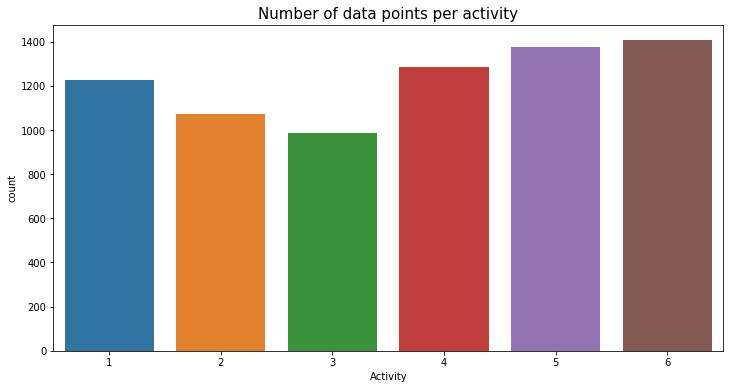

In [0]:
plt.figure(figsize=(12,6))
plt.title('Number of data points per activity',fontsize=15)
sn.countplot(train.Activity)
plt.plot

Dataset is well balanced

In [0]:
#getting xtrain and ytrain
x_train = train.drop(['subject','Activity','ActivityName'],axis=1)
y_train = train.ActivityName

#getting xtest and ytest
x_test = test.drop(['subject','Activity','ActivityName'],axis=1)
y_test = test.ActivityName

In [0]:
data = x_train.append(x_test)
label = y_train.append(y_test)

In [0]:
from sklearn.preprocessing import StandardScaler
tsne_x = StandardScaler().fit_transform(data)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


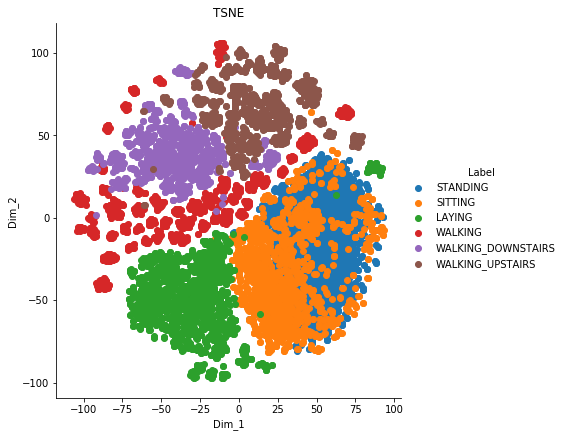

In [16]:
# performing tsne with perplexity=10 and n iteration=1000
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=10)
tsne_data = model.fit_transform(tsne_x)
tsne_data = np.vstack((tsne_data.T,label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1','Dim_2','Label'))

sn.FacetGrid(tsne_df,hue='Label',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('TSNE')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
# function to run the model
def train_and_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print("\n\nBEST ESTIMATOR :")
    print(model.best_estimator_)
    
    #calculating accuracy of the model
    y_pred = clf.predict(x_test)
    accu = accuracy_score(y_test,y_pred)*100
    print("\n\nACCURACY SCORE :",accu)
    print('\n\nCLASSIFICATION REPORT\n')
    print(classification_report(y_test,y_pred))
    
    #confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    
    #plotting confusion matrix
    labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
    plt.figure(figsize=(12,6))
    sn.heatmap(cm,annot=True,fmt='d',linewidth=0.5,cmap="Blues_r",xticklabels=labels,yticklabels=labels)
    plt.title("CONFUSION MATRIX",fontsize=15)
    plt.xlabel('Predicted score')
    plt.ylabel('Actual score')
    plt.plot

## Decision Tree

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


BET ESTIMATOR :
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


ACCURACY SCORE : 86.59653885307091


CLASSIFICATION REPORT

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.82      0.86       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.8

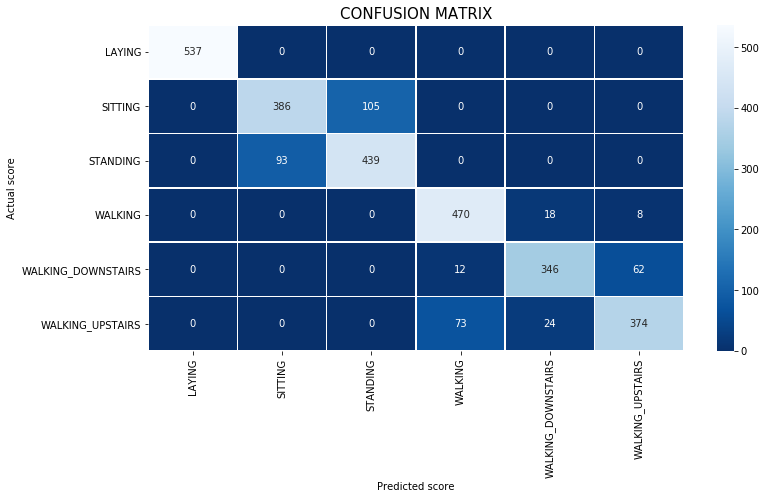

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
parameters = {'max_depth':np.arange(3,10,2)}
clf = GridSearchCV(dt,param_grid = parameters,n_jobs=-1)
model = train_and_test(clf,x_train,x_test,y_train,y_test)

## Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


BET ESTIMATOR :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


ACCURACY SCORE : 92.19545300305396


CLASSIFICATION REPORT

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.89       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.97      0.83      0.89       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          acc

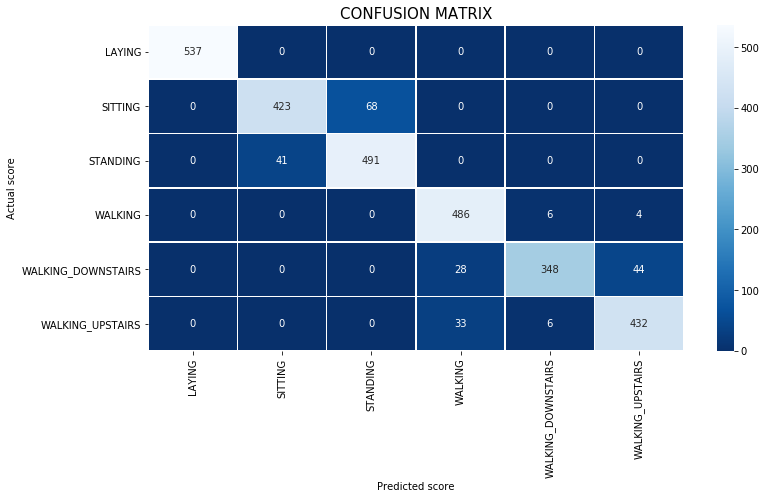

In [0]:
from sklearn.ensemble import RandomForestClassifier
param = {'n_estimators':np.arange(10,100,20), 'max_depth':np.arange(3,15,2)}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid = param, n_jobs=-1)
model = train_and_test(clf,x_train,x_test,y_train,y_test)

## Gradient Boosted Decision Tree

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 33.8min finished


BET ESTIMATOR :
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


ACCURACY SCORE : 93.99389209365457


CLASSIFICATION REPORT

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
     

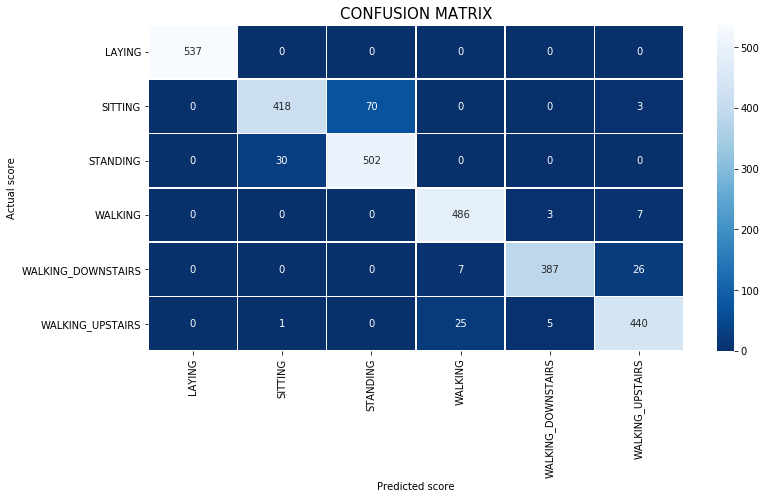

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param = {'max_depth':np.arange(3,7,2), 'n_estimators':np.arange(120,150,10)}
gbdt = GradientBoostingClassifier()
clf = GridSearchCV(gbdt, param_grid=param, n_jobs=-1, verbose =2)
model = train_and_test(clf,x_train,x_test,y_train,y_test)

## Support Vector Machine

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   45.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)




BEST ESTIMATOR :
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)


ACCURACY SCORE : 96.50492025788938


CLASSIFICATION REPORT

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



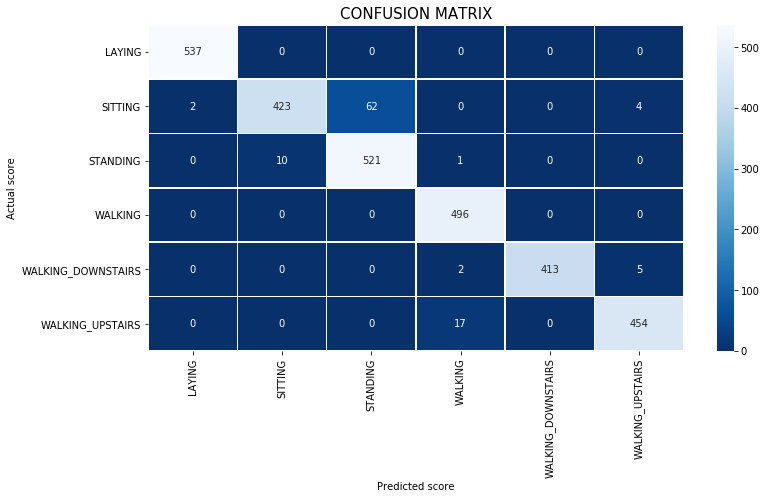

In [0]:
from sklearn.svm import LinearSVC
param = {'C':[0.5,1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
clf = GridSearchCV(lr_svc, param_grid=param, n_jobs=-1, verbose=1)
model = train_and_test(clf, x_train, x_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)




BEST ESTIMATOR :
SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE : 96.26739056667797


CLASSIFICATION REPORT

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



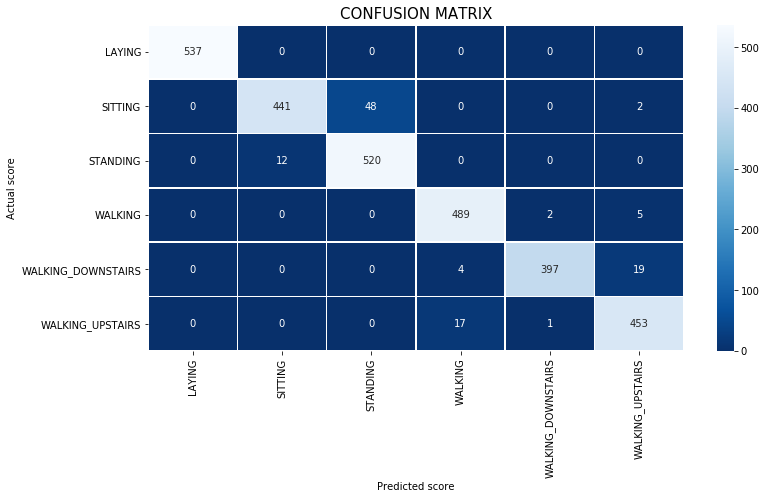

In [0]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
clf = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
model = train_and_test(clf, x_train, x_test, y_train, y_test)

## Neural Network

In [0]:
# Raw data signals
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# function to read the data
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    return np.transpose(signals_data, (1, 2, 0))

In [0]:
# function to load the labels
def load_y(subset):
 
    filename = f'/content/drive/My Drive/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
# function returns X_train,X_test,y_train,y_test
def load_data():
   
    
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# Import keras
from keras import backend as K

In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dropout,Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32
n_classes = 6

In [0]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])

In [0]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 86s 12ms/step - loss: 1.3771 - acc: 0.4158 - val_loss: 1.2021 - val_acc: 0.4768
Epoch 2/30
7352/7352 [==============================] - 85s 12ms/step - loss: 1.0177 - acc: 0.5597 - val_loss: 0.9846 - val_acc: 0.5263
Epoch 3/30
7352/7352 [==============================] - 86s 12ms/step - loss: 0.8074 - acc: 0.6258 - val_loss: 0.7858 - val_acc: 0.6332
Epoch 4/30
7352/7352 [==============================] - 86s 12ms/step - loss: 0.7359 - acc: 0.6635 - val_loss: 0.7290 - val_acc: 0.6284
Epoch 5/30
7352/7352 [==============================] - 85s 12ms/step - loss: 0.6877 - acc: 0.6680 - val_loss: 0.7128 - val_acc: 0.6634
Epoch 6/30
7352/7352 [==============================] - 86s 12ms/step - loss: 0.6728 - acc: 0.6868 - val_loss: 0.6992 - val_acc: 0.6837
Epoch 7/30
7352/7352 [==============================] - 85s 12ms/step - loss: 0.6172 - acc: 0.7274 - val_loss: 0.6984 - val_acc: 0.7055


In [0]:
score = model.evaluate(X_test, Y_test)
print(score)

2947/2947 [==============================] - 7s 2ms/step
[0.3993040389541531, 0.8995588734306074]
